In [298]:
import yt
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.transfer_functions import ProjectionTransferFunction, MultiVariateTransferFunction
from foggie.utils.get_refine_box import *
from foggie.utils.consistency import density_color_map, temperature_color_map, metal_color_map
from astropy.table import Table
import seaborn as sns

In [2]:
ds = yt.load("/Volumes/Elements/foggieforayan/halo_005036/nref11c_nref9f/RD0039/RD0039")

yt : [INFO     ] 2021-07-04 20:22:03,471 Parameters: current_time              = 551.00638892344
yt : [INFO     ] 2021-07-04 20:22:03,471 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-07-04 20:22:03,472 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-07-04 20:22:03,473 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-07-04 20:22:03,474 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-07-04 20:22:03,474 Parameters: current_redshift          = 0.14999996432242
yt : [INFO     ] 2021-07-04 20:22:03,474 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2021-07-04 20:22:03,475 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2021-07-04 20:22:03,475 Parameters: omega_radiation           = 0
yt : [INFO     ] 2021-07-04 20:22:03,476 Parameters: hubble_constant           = 0.695


In [3]:
fig_dir = '/Users/acharyya/Work/astro/foggie_outputs/plots_halo_005036/nref11c_nref9f/figs/RD0039/'
trackname = '/Users/acharyya/Work/astro/ayan_codes/foggie/foggie/halo_tracks/005036/nref11n_selfshield_15/halo_track_200kpc_nref9'
track = Table.read(trackname, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
refine_box, refine_box_center, x_width = get_refine_box(ds, zsnap, track)

Parsing Hierarchy :   5%|▍         | 391/8268 [00:00<00:02, 3909.14it/s]

get_refine_box: using this location:       col1         col2     col3     col4     col5     col6     col7   col8
---------------- -------- -------- -------- -------- -------- -------- ----
0.14988699094637 0.467738 0.500861 0.500344 0.469738 0.502861 0.502344    9


Parsing Hierarchy : 100%|█████████▉| 8267/8268 [00:00<00:00, 9025.31it/s] 
yt : [INFO     ] 2021-07-04 20:22:07,362 Gathering a field list (this may take a moment.)


In [ ]:
#%run projection_plot.py --system ayan_hd --halo 4123 --output RD0038 --noplot --fullbox

In [306]:
field = ('gas', 'metallicity')
weight_field = ('gas', 'density')
sc = yt.create_scene(refine_box, field=field)

In [307]:
metal_color_map = sns.blend_palette(("#4575b4", "#984ea3", "#984ea3", "#d73027", "darkorange", "#ffe34d"), as_cmap=True)

# Set the bounds of the transfer function
bounds_dict = {'density':(1e-29, 1e-22), 'temperature':(1e3,1e7), 'metallicity':((1e-2,1e1))}
bounds = bounds_dict[field[1]]
#bounds_cgh = (ds.quan(bounds[0], 'g/cm**3'), ds.quan(bounds[1], 'g/cm**3'))
colormap_dict = {'temperature':temperature_color_map, 'metallicity':'viridis', 'density':'viridis'}# 'cividis' # density_color_map # 
colormap = colormap_dict[field[1]]

In [308]:
# think of color transfer functions as contours in 3D that are NOT NECESSARILY evenly spaced
tfh = TransferFunctionHelper(ds)
tfh.set_field(field)
tfh.set_bounds(bounds)
tfh.set_log(True)
tfh.build_transfer_function()
tfh.grey_opacity = True

In [309]:
def linramp(vals, minval, maxval):
    return (vals - vals.min())/(vals.max() - vals.min())

# add_layers() function will add evenly spaced isocontours along the transfer function, sampling a colormap to determine the colors of the layers
nlayers = 5
#color_max = 3e-24
#color_max = 1e-24

tfh.tf.add_layers(nlayers, w=0.01, alpha=np.logspace(-2,0,nlayers), colormap=colormap)#, ma=np.log10(color_max), mi=np.log10(bounds[0]), col_bounds=[np.log10(bounds[0]),np.log10(color_max)])

# to add a single gaussian layer with a color determined by a colormap value, use sample_colormap()
#tfh.tf.sample_colormap(np.log10(2e-24), w=0.03, colormap=colormap)

# if you would like to add a gaussian with a customized color or no color, use add_gaussian()
#tfh.tf.add_gaussian(np.log10(5e-3), width=.01, height=[0.27, 0.46, 0.7, 0.01]) # height = [R,G,B,alpha] # blue
#tfh.tf.add_gaussian(np.log10(3e-2), width=.01, height=[0.6, 0.3, 0.6, 0.2]) # height = [R,G,B,alpha] # purple
#tfh.tf.add_gaussian(np.log10(1.5e-1), width=.01, height=[0.84, 0.19, 0.15, 0.1]) # height = [R,G,B,alpha] # maroon
#tfh.tf.add_gaussian(np.log10(7e-1), width=.01, height=[1, 0.55, 0, 0.1]) # height = [R,G,B,alpha] # darkorange
#tfh.tf.add_gaussian(np.log10(7e0), width=.01, height=[1, 0.9, 0.3, 2.0]) # height = [R,G,B,alpha] # yellow
#tfh.tf.add_gaussian(np.log10(2e1), width=.01, height=[1, 0.9, 0.9, 4.0]) # height = [R,G,B,alpha] # whitish

#tfh.tf.add_gaussian(np.log10(5e-3), width=.005, height=[0.28, 0.24, 0.54, 0.01]) # height = [R,G,B,alpha] # darkslateblue
#tfh.tf.add_gaussian(np.log10(3e-2), width=.005, height=[0.0, 0.5, 0.5, 0.05]) # height = [R,G,B,alpha] # teal
#tfh.tf.add_gaussian(np.log10(1.5e-1), width=.005, height=[0.0, 0.98, 0.6, 0.1]) # height = [R,G,B,alpha] # mediumspringgreen
#tfh.tf.add_gaussian(np.log10(7e-1), width=.005, height=[0.0, 0.98, 0.6, 0.5]) # height = [R,G,B,alpha] # mediumspringgreen
#tfh.tf.add_gaussian(np.log10(7e0), width=.005, height=[1.0, 1.0, 0.0, 2.0]) # height = [R,G,B,alpha] # yellow
#tfh.tf.add_gaussian(np.log10(2e1), width=.005, height=[1, 0.9, 0.9, 4.0]) # height = [R,G,B,alpha] # whitish

# Where the above options produced layered volume renderings, map_to_colormap() allows all of the density values 
# in a dataset to contribute to the volume rendering.\
#tfh.tf.map_to_colormap(np.log10(bounds[0]), np.log10(bounds[1]), colormap=colormap, scale_func=linramp)


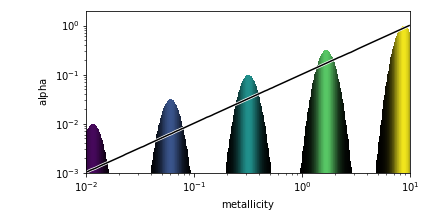

In [296]:
tfh.plot(profile_field=field, profile_weight=weight_field)

In [177]:
tfh.plot(profile_field='temperature')

KeyboardInterrupt: 

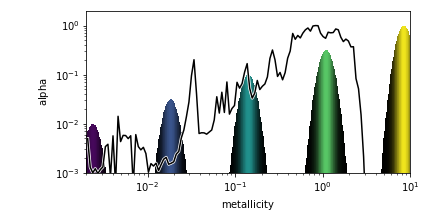

In [264]:
tfh.plot(profile_field=('gas', 'density'))

In [310]:
cam = sc.add_camera(refine_box, lens_type='perspective')
#cam = sc.camera
print('Default', cam)
cam.resolution = (256, 256) #(512, 512)
cam.set_position(refine_box.left_edge)
cam.focus = refine_box.center
#cam.focus = ds.domain_center
cam.north_vector = [1,0,0]
cam.zoom(1.68) ## temporary
cam.switch_view()
print('New', cam)

Default <Camera Object>:
	position:[1. 1. 1.] code_length
	focus:[0.5 0.5 0.5] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[1.5 1.5 1.5] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:perspective
	viewpoint:[0.0669873 0.0669873 0.0669873] code_length code_length
New <Camera Object>:
	position:[0.467738 0.500861 0.500344] unitary
	focus:[0.468738 0.501861 0.501344] unitary
	north_vector:[ 0.81649658 -0.40824829 -0.40824829] dimensionless
	width:[0.89285714 0.89285714 1.5       ] code_length
	light:None
	resolution:(256, 256)
Lens: <Lens Object>:
	lens_type:perspective
	viewpoint:[0.9017507 0.9348737 0.9343567] unitary unitary


In [311]:
ptf = ProjectionTransferFunction()
ptf.add_field_table(tfh.tf, 0)

In [312]:
source = sc.get_source()
#source.set_weight_field(weight_field)
source.set_transfer_function(ptf)#tfh.tf)

<Volume Source>:YTRegion (RD0039): , center=[1.80966454e+26 1.93754305e+26 1.93554706e+26] cm cm, left_edge=[1.80580382e+26 1.93368234e+26 1.93168635e+26] cm cm, right_edge=[1.81352526e+26 1.94140377e+26 1.93940778e+26] cm cm transfer_function:<yt.visualization.volume_rendering.transfer_functions.ProjectionTransferFunction object at 0x7f8bd74f3048>

yt : [INFO     ] 2021-07-07 19:32:40,421 Rendering scene (Can take a while).
yt : [INFO     ] 2021-07-07 19:32:40,427 Creating volume


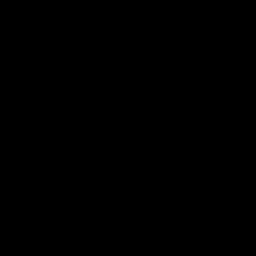

In [313]:
im = sc.render()
sc.show(sigma_clip=8)

yt : [INFO     ] 2021-07-07 17:55:29,211 Creating volume
/Users/acharyya/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/unyt/array.py:1674: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


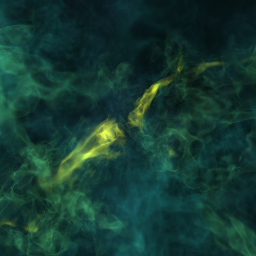

In [294]:
im = sc.render()
sc.show(sigma_clip=8)

yt : [INFO     ] 2021-07-07 18:23:27,806 Rendering scene (Can take a while).


New <Camera Object>:
	position:[0.467738 0.500861 0.500344] unitary
	focus:[0.468738 0.501861 0.501344] unitary
	north_vector:[ 0.81649658 -0.40824829 -0.40824829] dimensionless
	width:[0.1 0.1 1. ] unitary
	light:None
	resolution:(256, 256)
Lens: <Lens Object>:
	lens_type:perspective
	viewpoint:[0.75741313 0.79053613 0.79001913] unitary unitary


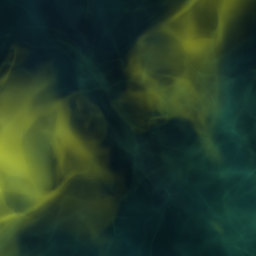

In [297]:
cam.set_width(ds.arr([0.1, 0.1, 1.0], 'code_length'))
cam.switch_orientation()
print('New', cam)

im = sc.render()
sc.show(sigma_clip=8)

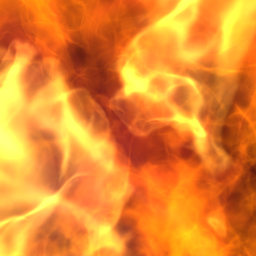

In [193]:
sc.show(sigma_clip=1)

In [ ]:
cam.rotate(np.pi/4.0, rot_center=ds.arr(cam.focus))
cam.switch_orientation()
print('New', cam)

im = sc.render()
sc.show(sigma_clip=8)